            
***Predicting Non-ambulatory Patients in Emergency Departments (ED) Using Probabilistic Graphical Models***

---




# 1.0 Downloading Packages

In [2]:
import numpy as np
import pandas as pd
!pip install arviz

In [3]:
!pip install pymc3==3.8

     |████████████████████████████████| 911kB 4.9MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [4]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_excel('/content/drive/My Drive/MIE_1516/Articles for project/Project_1516_patient_arrival_data.xlsx')

#2.0 Data Preparation and Descriptive Analysis of the Data

In [0]:
df['Hour'] = df['Time'].dt.hour

In [10]:
print(df)

                    Time  Patient_arrival   Age  Hour
0    2017-09-01 00:00:00                2  60.5     0
1    2017-09-01 01:00:00                2  38.5     1
2    2017-09-01 02:00:00                1  84.0     2
3    2017-09-01 03:00:00                2  20.5     3
4    2017-09-01 04:00:00                1  89.0     4
...                  ...              ...   ...   ...
1494 2017-11-02 06:00:00                0   0.0     6
1495 2017-11-02 07:00:00                0   0.0     7
1496 2017-11-02 08:00:00                4  76.5     8
1497 2017-11-02 09:00:00                6  66.5     9
1498 2017-11-02 10:00:00                1   2.0    10

[1499 rows x 4 columns]


In [11]:
print (df.describe())

       Patient_arrival          Age         Hour
count      1499.000000  1499.000000  1499.000000
mean          2.579720    51.496615    11.452302
std           1.867297    26.783426     6.926630
min           0.000000     0.000000     0.000000
25%           1.000000    37.666667     5.000000
50%           2.000000    57.000000    11.000000
75%           4.000000    71.380952    17.000000
max          10.000000    99.000000    23.000000


In [12]:
patient_arrival_hour=df.groupby('Hour')['Patient_arrival'].sum().fillna(0)
patient_arrival_hour

Hour
0     124
1     115
2      71
3      78
4      58
5      68
6      65
7      82
8     130
9     173
10    224
11    237
12    234
13    237
14    222
15    211
16    190
17    193
18    192
19    234
20    226
21    209
22    163
23    131
Name: Patient_arrival, dtype: int64

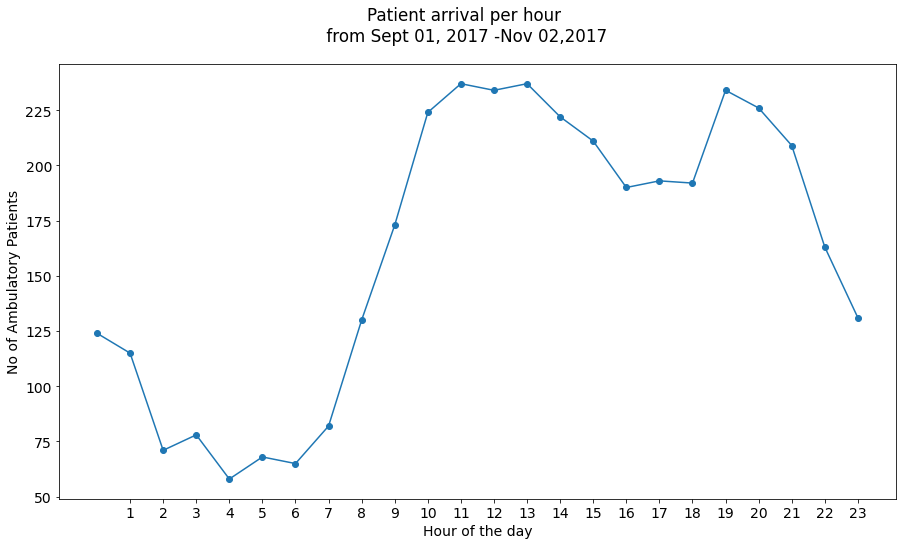

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams.update({'font.size': 14})
patient_arrival_hour.plot(linestyle='-', marker='o',x_compat=True)
plt.xticks(np.arange(1,24, 1)) 
plt.suptitle('Patient arrival per hour\n from Sept 01, 2017 -Nov 02,2017')
plt.xlabel('Hour of the day')
plt.ylabel("No of Ambulatory Patients")
plt.savefig('Ambulatory Patients arrival hourly.jpg')

In [14]:
# Mean age for each of the data
mean_age_hour=df.groupby('Hour')['Age'].mean()
mean_age_hour

Hour
0     41.791005
1     42.783598
2     30.538360
3     35.480159
4     38.402116
5     42.477778
6     38.841270
7     50.043651
8     55.644709
9     56.400397
10    64.931217
11    63.740630
12    59.143568
13    60.721985
14    58.880876
15    60.804724
16    54.682565
17    55.940054
18    61.634140
19    57.120712
20    53.815591
21    53.629685
22    49.329839
23    50.255108
Name: Age, dtype: float64

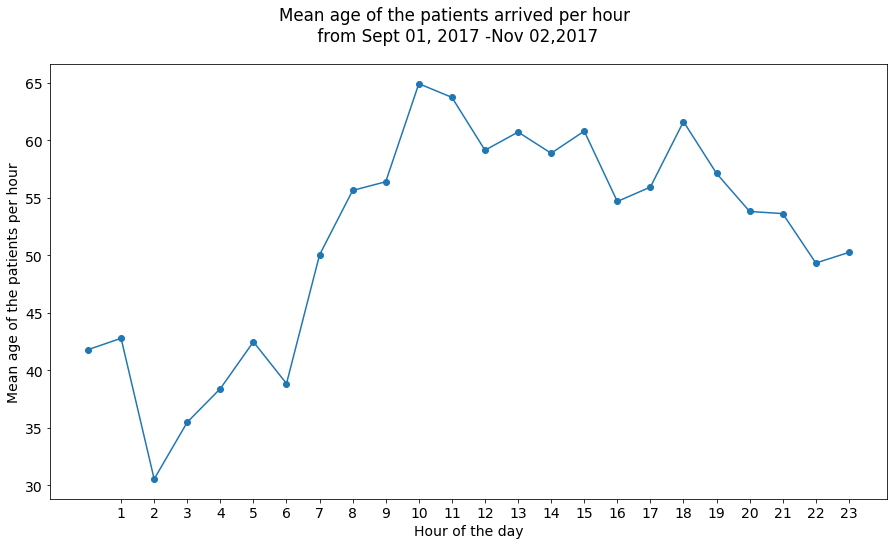

In [15]:
#Plotting the hourly mean age
plt.rcParams['figure.figsize']=(15,8)
plt.rcParams.update({'font.size': 14})
mean_age_hour.plot(linestyle='-', marker='o',x_compat=True)
plt.xticks(np.arange(1,24, 1)) 
plt.suptitle('Mean age of the patients arrived per hour\n from Sept 01, 2017 -Nov 02,2017')
plt.xlabel('Hour of the day')
plt.ylabel("Mean age of the patients per hour")
plt.savefig('Mean age of the patient hourly.jpg')

#3.0 Method

## 3.1 Model_1- involving both AGE and Hour 
(Sampling and Posterior Analysis)

In [0]:
age=df['Age']
hour=df['Hour']

In [17]:
# Main model


with pm.Model() as model1:
  
  b0 = pm.Normal('b0', mu=0, sd=10)
  b1 = pm.Normal('b1', mu=0, sd=20)
  b2 = pm.Normal('b2', mu=0, sd=5)
  
  theta_1=(b0+
            b1 * age +
            b2 * hour)
  
  patient_arrival=pm.Poisson('patient_arrival', mu= np.exp(theta_1)  , observed=df['Patient_arrival'].values)
  
  trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b2, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:11<00:00, 226.70it/s]
The acceptance probability does not match the target. It is 0.9305879927571632, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9445385674106089, but should be close to 0.8. Try to increase the number of tuning steps.


In [18]:
# Summary of the Model-1
pm.summary(trace_1)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
b0,-0.081,0.055,-0.183,0.018,0.001,0.001,1570.0,1518.0,1565.0,1662.0,1.0
b1,0.011,0.001,0.010,0.012,0.000,0.000,1715.0,1715.0,1724.0,1664.0,1.0
b2,0.034,0.003,0.029,0.038,0.000,0.000,1587.0,1584.0,1586.0,1451.0,1.0


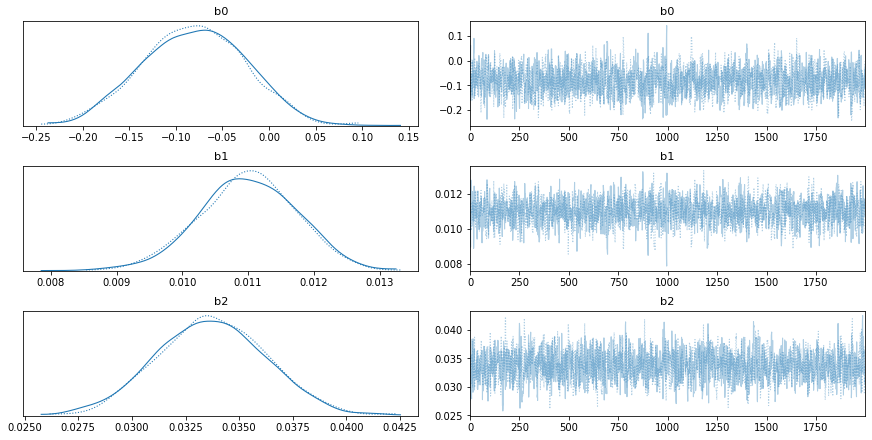

In [20]:
trace_1
pm.traceplot(trace_1);

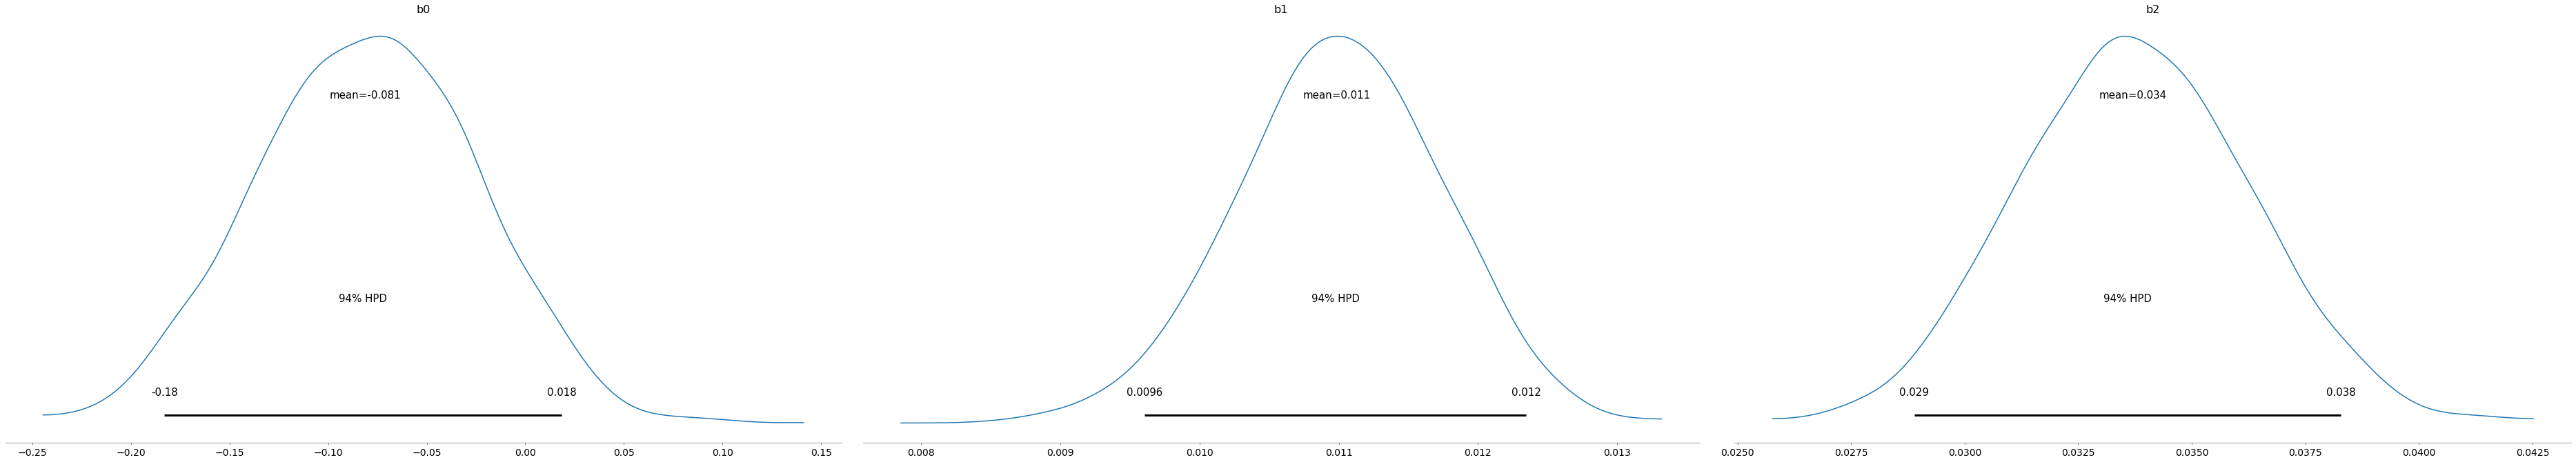

In [21]:
pm.plot_posterior(trace_1);

Mean Log-likelihood for Model-1, which will be used to evaluate the models.

In [22]:
# Mean-loglikelihood of Model-1
logp = model1.logp
lnp = np.array([logp(trace_1.point(i, chain=c)) for c in trace_1.chains for i in range(len(trace_1))])
sum_1=np.mean(lnp)
sum_1=sum_1
print(sum_1)

-2733.5373075557745


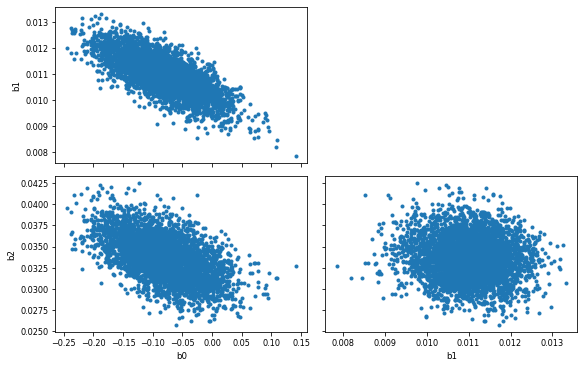

In [65]:
pm.pairplot(trace_1, var_names=['b0', 'b1', 'b2'], divergences=True, figsize=(8,5));

## 3.2 Model_2- involving only Age
(Sampling and Posterior Analysis)

In [37]:
with pm.Model() as model_2:
   
  b0 = pm.Normal('b0', mu=0, sd=10)
  b1 = pm.Normal('b1', mu=0, sd=20)
  
  
  theta_1=(b0+
            b1 * age)
  
  patient_arrival=pm.Poisson('patient_arrival', mu= np.exp(theta_1)  , observed=df['Patient_arrival'].values)
  
  trace_2 = pm.sample(2000)
  

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:06<00:00, 371.44it/s]
The acceptance probability does not match the target. It is 0.8903247286575586, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9191644327635129, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [38]:
pm.summary(trace_2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
b0,0.288,0.043,0.207,0.369,0.001,0.001,847.0,847.0,850.0,950.0,1.0
b1,0.012,0.001,0.011,0.013,0.000,0.000,855.0,853.0,859.0,958.0,1.0


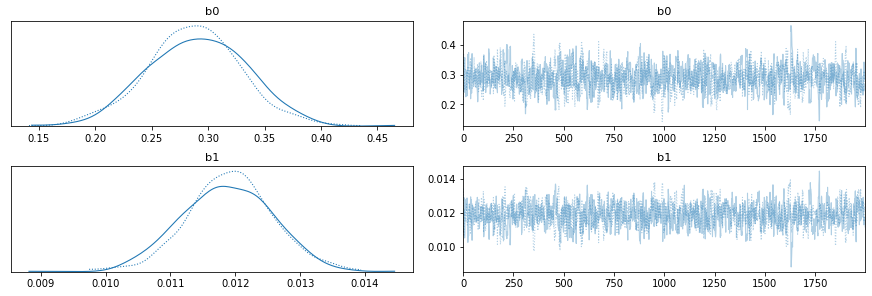

In [39]:
trace_2
pm.traceplot(trace_2);

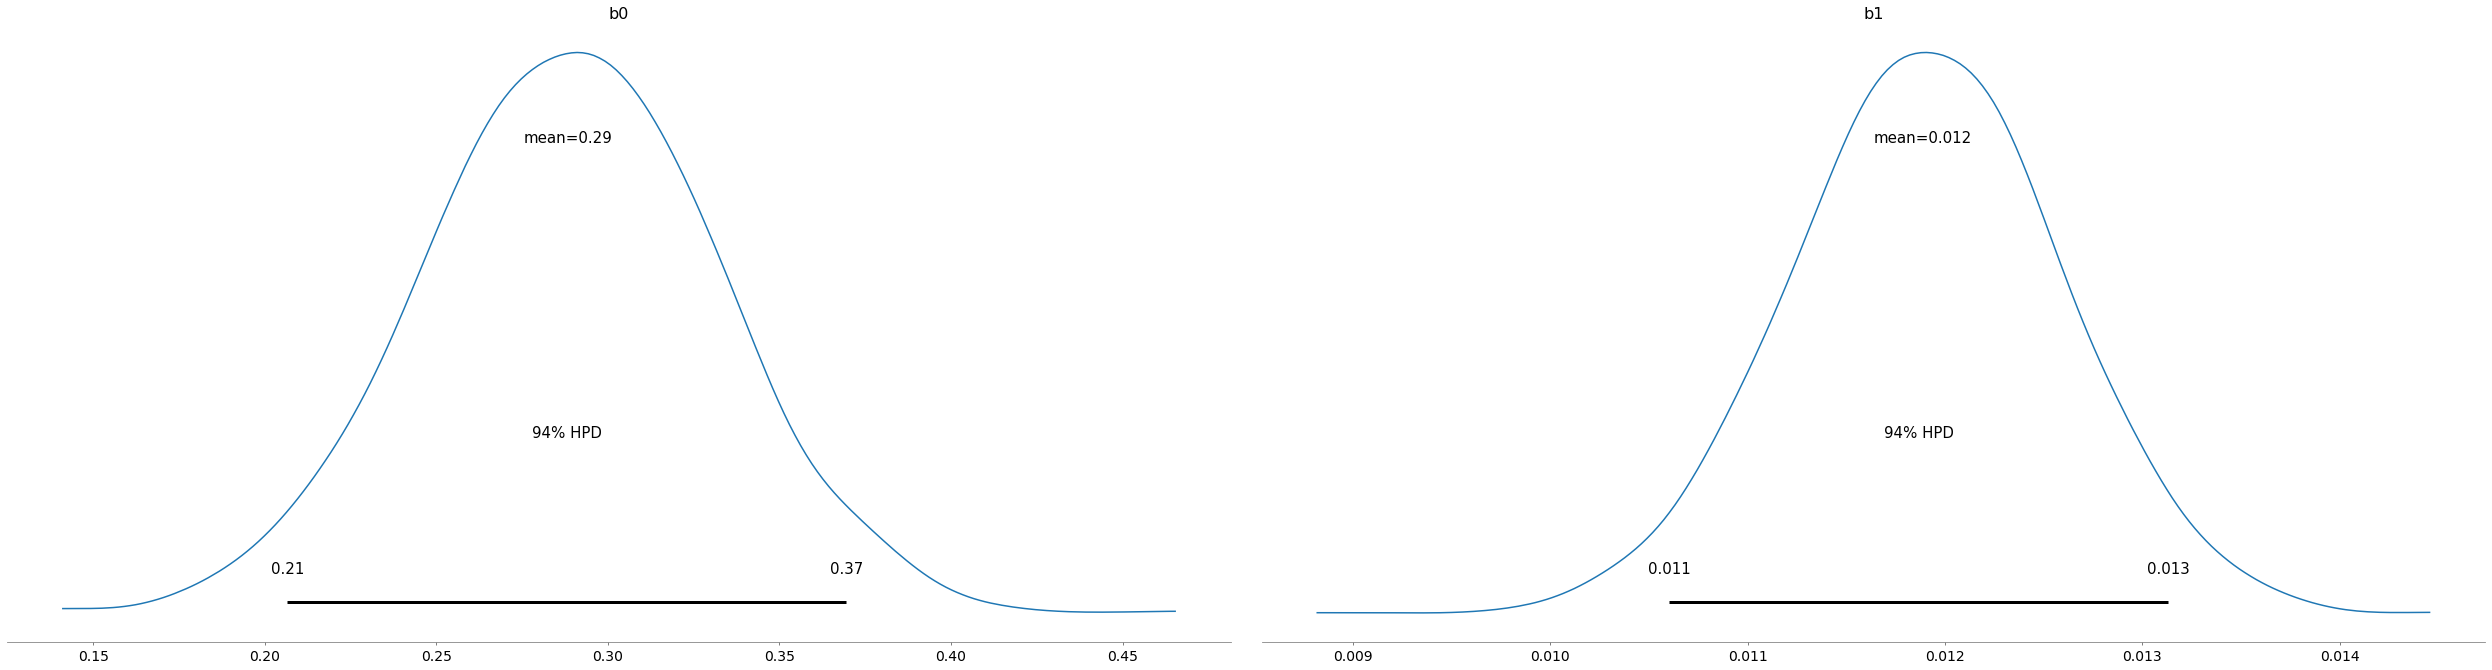

In [40]:
pm.plot_posterior(trace_2);

In [41]:
logp = model_2.logp
lnp = np.array([logp(trace_2.point(i, chain=c)) for c in trace_1.chains for i in range(len(trace_1))])
sum_2=np.mean(lnp)
sum_2=sum_2
print(sum_2)

-2827.749962555064


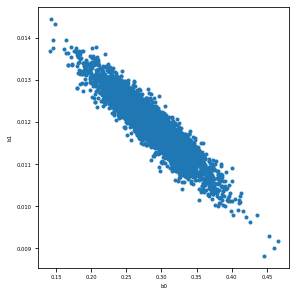

In [64]:
pm.pairplot(trace_2, var_names=['b0', 'b1'], divergences=True,figsize= (4,4));

## 3.3 Model_3- involving only Hour (Sampling and Posterior Analysis)

In [47]:
with pm.Model() as model_3:
   
  b0 = pm.Normal('b0', mu=0, sd=10)
  b2 = pm.Normal('b2', mu=0, sd=5)
  
  
  theta_1=(b0+
            b2 * hour)
  
  patient_arrival=pm.Poisson('patient_arrival', mu= np.exp(theta_1)  , observed=df['Patient_arrival'].values)
  
  trace_3 = pm.sample(2000)
  

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [b2, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:04<00:00, 588.27it/s]
The number of effective samples is smaller than 25% for some parameters.


In [48]:
pm.summary(trace_3)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
b0,0.468,0.037,0.400,0.538,0.001,0.001,933.0,933.0,931.0,967.0,1.0
b2,0.039,0.002,0.034,0.043,0.000,0.000,973.0,959.0,973.0,1018.0,1.0


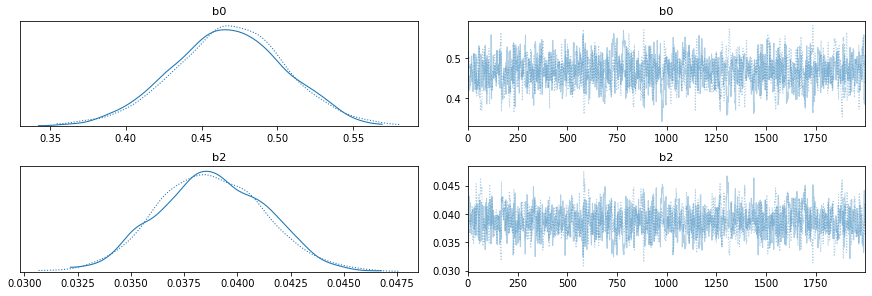

In [49]:
trace_3
pm.traceplot(trace_3);

In [50]:
logp = model_3.logp
lnp = np.array([logp(trace_3.point(i, chain=c)) for c in trace_1.chains for i in range(len(trace_1))])
sum_3=np.mean(lnp)
sum_3=sum_3
print(sum_3)

-2857.5476002045043


<Figure size 504x360 with 0 Axes>

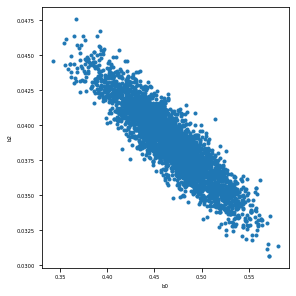

In [62]:
plt.figure(figsize=(7,5))
pm.pairplot(trace_3, var_names=['b0', 'b2'], divergences=True,figsize=(4,4));

# 4.0 Model Comparisons

## 4.1 Log_likelihood

In [52]:
log_like= [sum_1, sum_2, sum_3]
log_like

[-2733.5373075557745, -2827.749962555064, -2857.5476002045043]

In [0]:
x=['Model_1', 'Model_2', 'Model_3']

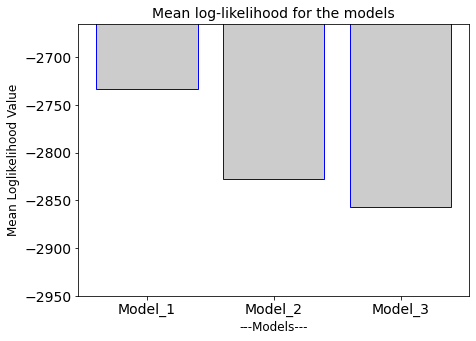

In [66]:

import matplotlib.cm as cm
import math
#plt.scatter(x, log_like)
my_cmap = cm.get_cmap('jet')
#color=my_cmap(my_norm(data))
#plt.show()
plt.figure(figsize=(7,5))
low = min(log_like)
high = max(log_like)
plt.ylim([math.ceil(low-0.75*(high-low)), math.ceil(high+0.55*(high-low))])
plt.bar(x,log_like,align='center',color=(0.8, 0.8, 0.8),  edgecolor='blue') 
plt.title('Mean log-likelihood for the models', fontsize=14)
plt.xlabel('---Models---', fontsize=12)
plt.ylabel('Mean Loglikelihood Value', fontsize=12)
#fig.savefig('test1.jpg')

plt.show()


## 4.2 Mean Absolute Error

In [67]:
y_pred1 = pm.sample_posterior_predictive(trace_1, 1, model=model1)['patient_arrival']

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 29.28it/s]


In [68]:
y_pred2 = pm.sample_posterior_predictive(trace_2, 1, model=model_2)['patient_arrival']

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 35.61it/s]


In [69]:
y_pred3 = pm.sample_posterior_predictive(trace_3, 1, model=model_3)['patient_arrival']

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 37.12it/s]


In [0]:
y=df['Patient_arrival']

In [0]:
df_yred1 = pd.DataFrame(y_pred1, index=range(y_pred1.shape[0]),columns=range(y_pred1.shape[1]))
final_pred_1= df_yred1.T

In [0]:
df_yred2 = pd.DataFrame(y_pred2, index=range(y_pred2.shape[0]),columns=range(y_pred2.shape[1]))
final_pred_2= df_yred2.T

In [0]:
df_yred3 = pd.DataFrame(y_pred3, index=range(y_pred3.shape[0]),columns=range(y_pred3.shape[1]))
final_pred_3= df_yred3.T

In [0]:
from sklearn.metrics import mean_absolute_error
MAE_1= mean_absolute_error(y, final_pred_1)


In [0]:
from sklearn.metrics import mean_absolute_error
MAE_2=mean_absolute_error(y, final_pred_2)

In [0]:
from sklearn.metrics import mean_absolute_error
MAE_3=mean_absolute_error(y, final_pred_3)

In [77]:
MAE=[MAE_1, MAE_2,MAE_3]
print(MAE)


[1.770513675783856, 1.818545697131421, 1.8312208138759172]


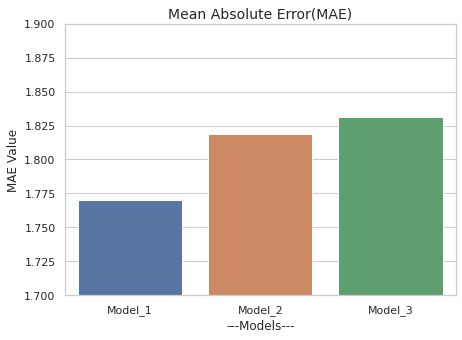

In [79]:
import math
import seaborn as sns

low = min(MAE)
high = max(MAE)
plt.figure(figsize=(7,5))

plt.ylim(1.7, 1.9)

sns.set(style="whitegrid")
ax = sns.barplot(x=x, y=MAE)
plt.title('Mean Absolute Error(MAE)', fontsize=14)
plt.xlabel('---Models---', fontsize=12)
plt.ylabel('MAE Value', fontsize=12)
#fig.savefig('test2.jpg')



plt.show()

## 4.3 WAIC

In [80]:
import arviz as az
waic_1 = az.waic(trace_1)
waic_1

Computed from 4000 by 1499 log-likelihood matrix

          Estimate       SE
elpd_waic -2725.55    31.27
p_waic        3.35        -

In [81]:
waic_2=az.waic(trace_2)
waic_2

Computed from 4000 by 1499 log-likelihood matrix

          Estimate       SE
elpd_waic -2821.80    31.01
p_waic        2.36        -

In [82]:
waic_3=az.waic(trace_3)
waic_3

Computed from 4000 by 1499 log-likelihood matrix

          Estimate       SE
elpd_waic -2853.01    31.23
p_waic        2.42        -

In [83]:
df_comp_WAIC = pm.compare({'model_1': trace_1, 'model_2': trace_2, 'model_3': trace_3},ic='WAIC')
df_comp_WAIC

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_1,0,-2725.55,3.35072,0,1,32.3271,0,False,log
model_2,1,-2821.8,2.36369,96.2435,7.51121e-17,31.459,13.7209,False,log
model_3,2,-2853.01,2.41665,127.454,5.8228e-36,32.1513,17.2964,False,log


## 4.4 Posterior Predcitive Checks 

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
y1=df['Patient_arrival'][1:50]
x1=range(1,50)


<Figure size 1080x720 with 0 Axes>

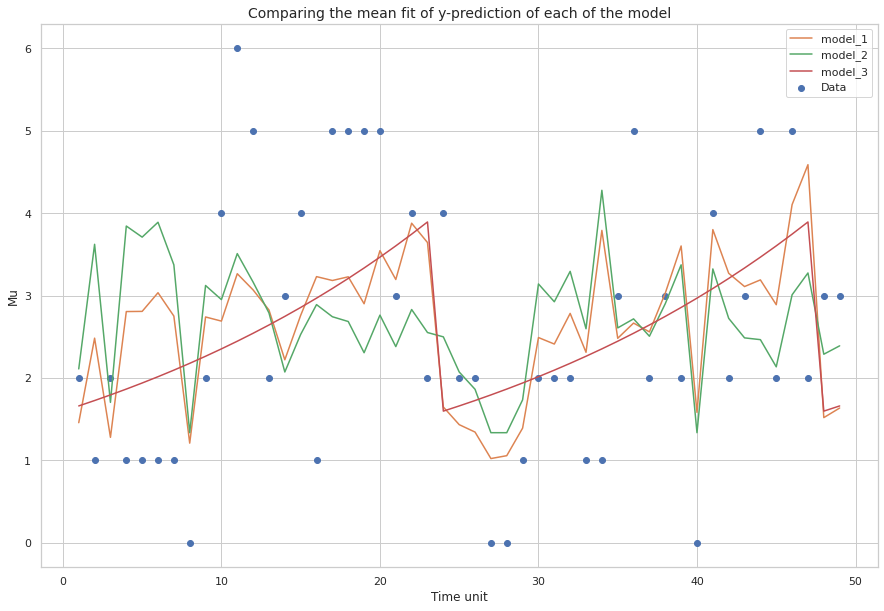

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(x1,y1, label='Data')
############
b0_1 = trace_1['b0'].mean()
b1_1 = trace_1['b1'].mean(axis=0)
b2_1 = trace_1['b2'].mean(axis=0)
y_1= np.exp(b0_1 + b1_1 * age + b2_1* hour)
plt.plot(x1, y_1[1:50], 'C1', label='model_1')
plt.legend(loc='best')
#############

b0_2 = trace_2['b0'].mean()
b1_2 = trace_2['b1'].mean(axis=0)
y_2= np.exp(b0_2 + b1_2 * age) 
plt.plot(x1, y_2[1:50], 'C2', label='model_2')
plt.legend(loc='best')
###########
b0_3 = trace_3['b0'].mean()
b2_3 = trace_3['b2'].mean(axis=0)
y_3= np.exp(b0_3 + b2_3 * hour) 
plt.plot(x1, y_3[1:50], 'C3', label='model_3')
##########
plt.title('Comparing the mean fit of y-prediction of each of the model', fontsize=14 )
plt.xlabel('Time unit', fontsize=12)
plt.ylabel('Mu', fontsize=12)
plt.legend(loc='best')

# 5.0 Conclusion 

##Plotting actual data vs predictions from Model-1

Text(0, 0.5, 'No. of patient arrival per hour')

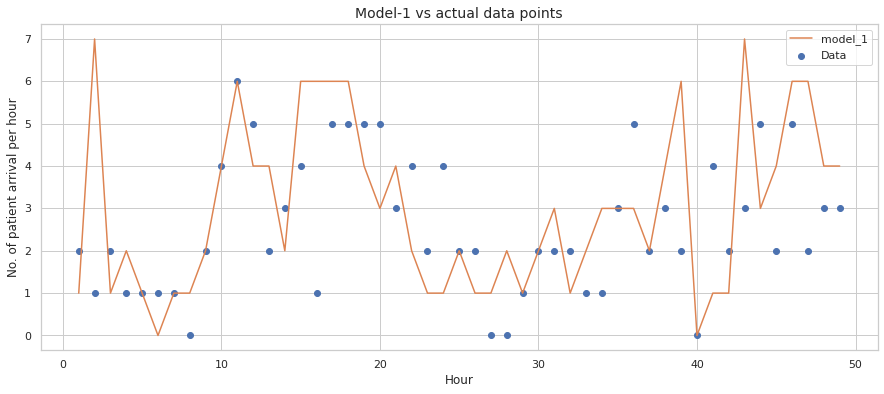

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.scatter(x1,y1, label='Data')
plt.plot(x1, final_pred_1[1:50], 'C1', label='model_1')
plt.legend(loc='best')
plt.title('Model-1 vs actual data points', fontsize=14 )
plt.xlabel('Hour', fontsize=12)
plt.ylabel('No. of patient arrival per hour', fontsize=12)
